<a href="https://colab.research.google.com/github/SamDavies114/pyTorchDeepLearnIntro/blob/main/Simple_NeuralNetwork_saved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import numpy as np

In [19]:
import torch.nn as nn

In [20]:
import torch.nn.functional as F

In [21]:
#create a model class that inherits nn.Module
class Model(nn.Module):
  #Input layer(four flower features, petal length, width etc) ->hidden layer1->hidden layer2-> output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8,h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear (h2, out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))#relu changes all less thwan zero to zero and doesnt change anyrhing else
    x= F.relu(self.fc2(x))
    x= F.relu(self.out(x))

    return x


In [22]:
#creat instance
torch.manual_seed(41)
model = Model()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [25]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

In [26]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
# Train test and split things
X= my_df.drop('variety', axis=1)
y = my_df['variety']
X = X.values
y=y.values

In [28]:
from sklearn.model_selection import train_test_split #this splits the sample data into a set used for training and a set used to test the network

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [30]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_test


tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [31]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [33]:
epochs = 100
losses = []
for i in range(epochs):
  #get prediction
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)

  #keep track of loss
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epochs: {i} loss: {loss}')

  #Back propogation
  #take error, feedback, change weights to reduce error
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epochs: 0 loss: 1.125203251838684
Epochs: 10 loss: 1.0097211599349976
Epochs: 20 loss: 0.8516881465911865
Epochs: 30 loss: 0.6555687189102173
Epochs: 40 loss: 0.45029518008232117
Epochs: 50 loss: 0.2718472480773926
Epochs: 60 loss: 0.1553877890110016
Epochs: 70 loss: 0.09336269646883011
Epochs: 80 loss: 0.06463461369276047
Epochs: 90 loss: 0.05066271126270294


Text(0.5, 0, 'epochs')

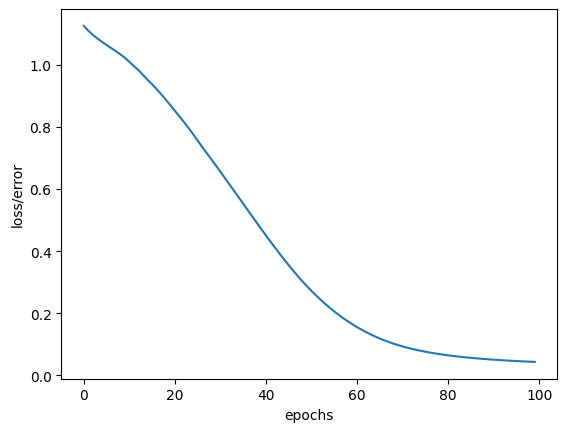

In [34]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")


In [35]:
#testing
with torch.no_grad():#stop back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)



In [36]:
print(loss)

tensor(0.1295)


In [37]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    print(f'{i+1}.) {str(y_val)}      \t expected: {y_test[i]} \t actual: {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(correct)

1.) tensor([0.0000, 7.4447, 9.9152])      	 expected: 2 	 actual: 2
2.) tensor([ 0.0000,  7.7042, 14.3743])      	 expected: 2 	 actual: 2
3.) tensor([ 0.0000,  9.1280, 15.1753])      	 expected: 2 	 actual: 2
4.) tensor([0.2102, 8.3280, 4.5364])      	 expected: 1 	 actual: 1
5.) tensor([ 0.0000,  8.4035, 12.4779])      	 expected: 2 	 actual: 2
6.) tensor([1.6255, 8.0527, 1.9799])      	 expected: 1 	 actual: 1
7.) tensor([0.0000, 8.0659, 9.2757])      	 expected: 2 	 actual: 2
8.) tensor([0.3294, 8.4105, 4.3070])      	 expected: 1 	 actual: 1
9.) tensor([ 0.0000,  8.2367, 10.8423])      	 expected: 2 	 actual: 2
10.) tensor([ 0.0000,  8.1941, 15.2505])      	 expected: 2 	 actual: 2
11.) tensor([0.0000, 7.9806, 8.7350])      	 expected: 2 	 actual: 2
12.) tensor([8.9715, 3.4637, 0.0000])      	 expected: 0 	 actual: 0
13.) tensor([8.0554, 3.1741, 0.0000])      	 expected: 0 	 actual: 0
14.) tensor([2.2377, 6.4805, 0.4353])      	 expected: 1 	 actual: 1
15.) tensor([8.0202, 3.9148,

In [39]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))




tensor([8.5194, 3.3207, 0.0000])


In [41]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([ 0.0000,  7.5979, 10.1487])


In [43]:
#saving model
torch.save(model.state_dict(), 'simple_iris_model.pt')

In [45]:
new_model = Model()
new_model.load_state_dict(torch.load('simple_iris_model.pt'))

<All keys matched successfully>

In [47]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)